<a href="https://colab.research.google.com/github/srishanthdevoju/eda_tekworks/blob/main/StatisticsOfData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np

categories = ['junior', 'senior', 'manager']
num_values = 20

# Create a Series with 20 random values from the categories
series_data = np.random.choice(categories, size=num_values)
display(series_data)
# Convert the NumPy array to a Pandas Series
my_series = pd.Series(series_data)

# Display the series
display(my_series)

array(['manager', 'manager', 'senior', 'senior', 'junior', 'manager',
       'junior', 'junior', 'senior', 'senior', 'manager', 'senior',
       'junior', 'senior', 'senior', 'manager', 'senior', 'senior',
       'manager', 'junior'], dtype='<U7')

,0
0,manager
1,manager
2,senior
3,senior
4,junior
5,manager
6,junior
7,junior
8,senior
9,senior


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the series
encoded_series = label_encoder.fit_transform(my_series)

# Display the original and encoded series
print("Original Series:")
display(my_series)
print("\nEncoded Series:")
display(encoded_series)

# To see the mapping
print("\nMapping of categories to integers:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")

Original Series:


,0
0,senior
1,manager
2,senior
3,senior
4,senior
5,manager
6,manager
7,manager
8,senior
9,junior



Encoded Series:


array([2, 1, 2, 2, 2, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 2, 0, 2, 1])


Mapping of categories to integers:
junior: 0
manager: 1
senior: 2


In [ ]:
import pandas as pd

# Implement dummy variables
dummy_variables = pd.get_dummies(my_series, prefix='category',dtype=int)

# Display the resulting dummy variables
print("Original Series:")
display(my_series)
print("\nDummy Variables:")
display(dummy_variables)

Original Series:


,0
0,manager
1,manager
2,senior
3,senior
4,junior
5,manager
6,junior
7,junior
8,senior
9,senior



Dummy Variables:


,category_junior,category_manager,category_senior
0,0,1,0
1,0,1,0
2,0,0,1
3,0,0,1
4,1,0,0
5,0,1,0
6,1,0,0
7,1,0,0
8,0,0,1
9,0,0,1


**LOAN ANALYSIS**


In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
path='/content/drive/MyDrive/Colab Notebooks/StasticsForData_tek/loan_approved.csv'
try:
    df=pd.read_csv(path, encoding='latin1')
    print(df)
    print("-"*90)
    print("Thr column names, data types:")
    print(df.info())
    print("-"*90)
    print("The basic statistics:")
    print(df.describe())
    print("-"*90)
    print("shape:",df.shape)
    print("-"*90)
    print("Count of NUll:",df.isnull().sum())
    print("-"*90)
    print("the missing values or anomalies:")
    print("Count of Duplicates:",df.duplicated().sum())
    print("-"*30)
    print(df.shape)
except UnicodeDecodeError:
    print("Could not decode the file using 'latin1'. Please try another encoding if you know it.")

Mounted at /content/drive
      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                

In [ ]:
display(df.isnull().sum())

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
display(missing_percentage.round(2).sort_values(ascending=False))

,0
Credit_History,8.14
Self_Employed,5.21
LoanAmount,3.58
Dependents,2.44
Loan_Amount_Term,2.28
Gender,2.12
Married,0.49
Education,0.00
Loan_ID,0.00
CoapplicantIncome,0.00


In [ ]:
# Duplicate the original dataset
df_cleaned = df.copy()

# --- Handle Missing Values ---

# Impute categorical columns with their mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    if df_cleaned[col].isnull().any():
        mode_value = df_cleaned[col].mode()[0]
        df_cleaned[col] = df_cleaned[col].fillna(mode_value)

# Impute numerical columns with their median
for col in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    if df_cleaned[col].isnull().any():
        median_value = df_cleaned[col].median()
        df_cleaned[col] = df_cleaned[col].fillna(median_value)

# --- Handle Duplicate Values ---

# Remove duplicate rows
initial_rows = df_cleaned.shape[0]
df_cleaned.drop_duplicates(inplace=True)
duplicates_removed = initial_rows - df_cleaned.shape[0]

print("--- Data Cleaning Summary ---")
print(f"Initial number of rows: {initial_rows}")
print(f"Number of duplicate rows removed: {duplicates_removed}")
print(f"Final number of rows after removing duplicates: {df_cleaned.shape[0]}")
print("\nMissing values after imputation:")
display(df_cleaned.isnull().sum())
print("\nFirst 5 rows of the cleaned DataFrame:")
display(df_cleaned.head())

--- Data Cleaning Summary ---
Initial number of rows: 614
Number of duplicate rows removed: 0
Final number of rows after removing duplicates: 614

Missing values after imputation:


,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0



First 5 rows of the cleaned DataFrame:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to store the encoded data, if not already working on df_cleaned
df_encoded = df_cleaned.copy()

# Identify categorical columns for encoding (excluding 'Loan_ID')
categorical_cols = [
    'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
    'Property_Area', 'Loan_Status (Approved)'
]

label_encoders = {}
for col in categorical_cols:
    if col in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le # Store encoder for reverse transformation or inspection

print("DataFrame after Label Encoding:")
display(df_encoded.head())

print("\nExample of Label Encoding mapping for 'Gender' column:")
if 'Gender' in label_encoders:
    gender_encoder = label_encoders['Gender']
    for i, category in enumerate(gender_encoder.classes_):
        print(f"{category}: {i}")


DataFrame after Label Encoding:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1



Example of Label Encoding mapping for 'Gender' column:
Female: 0
Male: 1


Here are the label encoding mappings for each of the categorical columns:

In [ ]:
# Display the mapping for each encoded column
for col_name, encoder in label_encoders.items():
    print(f"\n--- Mapping for column '{col_name}' ---")
    for i, category in enumerate(encoder.classes_):
        print(f"{category}: {i}")



--- Mapping for column 'Gender' ---
Female: 0
Male: 1

--- Mapping for column 'Married' ---
No: 0
Yes: 1

--- Mapping for column 'Dependents' ---
0: 0
1: 1
2: 2
3+: 3

--- Mapping for column 'Education' ---
Graduate: 0
Not Graduate: 1

--- Mapping for column 'Self_Employed' ---
No: 0
Yes: 1

--- Mapping for column 'Property_Area' ---
Rural: 0
Semiurban: 1
Urban: 2

--- Mapping for column 'Loan_Status (Approved)' ---
N: 0
Y: 1


### One-Hot Encoding for 'Gender':

In [ ]:
import pandas as pd
one_hot_gender = pd.get_dummies(df_cleaned['Gender'], prefix='Gender', dtype=int)
display(pd.concat([df_cleaned['Gender'], one_hot_gender], axis=1).head())

,Gender,Gender_Female,Gender_Male
0,Male,0,1
1,Male,0,1
2,Male,0,1
3,Male,0,1
4,Male,0,1


### One-Hot Encoding for 'Married':

In [ ]:
import pandas as pd
one_hot_married = pd.get_dummies(df_cleaned['Married'], prefix='Married', dtype=int)
display(pd.concat([df_cleaned['Married'], one_hot_married], axis=1).head())

,Married,Married_No,Married_Yes
0,No,1,0
1,Yes,0,1
2,Yes,0,1
3,Yes,0,1
4,No,1,0


### One-Hot Encoding for 'Dependents':

In [ ]:
import pandas as pd
one_hot_dependents = pd.get_dummies(df_cleaned['Dependents'], prefix='Dependents', dtype=int)
display(pd.concat([df_cleaned['Dependents'], one_hot_dependents], axis=1).head())

,Dependents,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,0,1,0,0,0
1,1,0,1,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


### One-Hot Encoding for 'Education':

In [ ]:
import pandas as pd
one_hot_education = pd.get_dummies(df_cleaned['Education'], prefix='Education', dtype=int)
display(pd.concat([df_cleaned['Education'], one_hot_education], axis=1).head())

,Education,Education_Graduate,Education_Not Graduate
0,Graduate,1,0
1,Graduate,1,0
2,Graduate,1,0
3,Not Graduate,0,1
4,Graduate,1,0


### One-Hot Encoding for 'Self_Employed':

In [ ]:
import pandas as pd
one_hot_self_employed = pd.get_dummies(df_cleaned['Self_Employed'], prefix='Self_Employed', dtype=int)
display(pd.concat([df_cleaned['Self_Employed'], one_hot_self_employed], axis=1).head())

,Self_Employed,Self_Employed_No,Self_Employed_Yes
0,No,1,0
1,No,1,0
2,Yes,0,1
3,No,1,0
4,No,1,0


### One-Hot Encoding for 'Property_Area':

In [ ]:
import pandas as pd
one_hot_property_area = pd.get_dummies(df_cleaned['Property_Area'], prefix='Property_Area', dtype=int)
display(pd.concat([df_cleaned['Property_Area'], one_hot_property_area], axis=1).head())

,Property_Area,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,Urban,0,0,1
1,Rural,1,0,0
2,Urban,0,0,1
3,Urban,0,0,1
4,Urban,0,0,1


### One-Hot Encoding for 'Loan_Status (Approved)':

In [ ]:
import pandas as pd
one_hot_loan_status = pd.get_dummies(df_cleaned['Loan_Status (Approved)'], prefix='Loan_Status (Approved)', dtype=int)
display(pd.concat([df_cleaned['Loan_Status (Approved)'], one_hot_loan_status], axis=1).head())

,Loan_Status (Approved),Loan_Status (Approved)_N,Loan_Status (Approved)_Y
0,Y,0,1
1,N,1,0
2,Y,0,1
3,Y,0,1
4,Y,0,1


### One-Hot Encoding for each categorical column:

In [ ]:
import pandas as pd

categorical_cols_for_one_hot = [
    'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
    'Property_Area', 'Loan_Status (Approved)'
]

for col in categorical_cols_for_one_hot:
    print(f"\n--- One-Hot Encoding for column '{col}' ---")
    # Use df_cleaned as the source for one-hot encoding since it has no missing values
    one_hot_encoded = pd.get_dummies(df_cleaned[col], prefix=col, dtype=int)
    display(pd.concat([df_cleaned[col], one_hot_encoded], axis=1).head())



--- One-Hot Encoding for column 'Gender' ---


,Gender,Gender_Female,Gender_Male
0,Male,0,1
1,Male,0,1
2,Male,0,1
3,Male,0,1
4,Male,0,1



--- One-Hot Encoding for column 'Married' ---


,Married,Married_No,Married_Yes
0,No,1,0
1,Yes,0,1
2,Yes,0,1
3,Yes,0,1
4,No,1,0



--- One-Hot Encoding for column 'Dependents' ---


,Dependents,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,0,1,0,0,0
1,1,0,1,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0



--- One-Hot Encoding for column 'Education' ---


,Education,Education_Graduate,Education_Not Graduate
0,Graduate,1,0
1,Graduate,1,0
2,Graduate,1,0
3,Not Graduate,0,1
4,Graduate,1,0



--- One-Hot Encoding for column 'Self_Employed' ---


,Self_Employed,Self_Employed_No,Self_Employed_Yes
0,No,1,0
1,No,1,0
2,Yes,0,1
3,No,1,0
4,No,1,0



--- One-Hot Encoding for column 'Property_Area' ---


,Property_Area,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,Urban,0,0,1
1,Rural,1,0,0
2,Urban,0,0,1
3,Urban,0,0,1
4,Urban,0,0,1



--- One-Hot Encoding for column 'Loan_Status (Approved)' ---


,Loan_Status (Approved),Loan_Status (Approved)_N,Loan_Status (Approved)_Y
0,Y,0,1
1,N,1,0
2,Y,0,1
3,Y,0,1
4,Y,0,1


In [ ]:
import pandas as pd
display(df_cleaned.dtypes)

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
display(df_cleaned.nunique())

,0
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


### One-Hot Encoding for 'Married' with `drop_first=True`:

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive if not already mounted
# drive.mount('/content/drive', force_remount=True)

# Define the path to save the preprocessed data in Google Drive
save_path = '/content/drive/MyDrive/preprocssed_loan.csv'

# Save the df_encoded DataFrame to CSV, without the index
df_encoded.to_csv(save_path, index=False)

print(f"DataFrame saved successfully to: {save_path}")

DataFrame saved successfully to: /content/drive/MyDrive/preprocssed_loan.csv


In [ ]:
import pandas as pd

one_hot_married_drop_first = pd.get_dummies(df_cleaned['Married'], prefix='Married', drop_first=True, dtype=int)
display(pd.concat([df_cleaned['Married'], one_hot_married_drop_first], axis=1).head())
#display(one_hot_married_drop_first)

,Married,Married_Yes
0,No,0
1,Yes,1
2,Yes,1
3,Yes,1
4,No,0


In [ ]:
# Label encoding for 'Dependents' was already performed when creating df_encoded.
# Here's how the 'Dependents' column looks in df_encoded:
display(df_encoded[['Dependents']].head())

# To reiterate the mapping:
print("\nMapping for column 'Dependents':")
if 'Dependents' in label_encoders:
    dependents_encoder = label_encoders['Dependents']
    for i, category in enumerate(dependents_encoder.classes_):
        print(f"{category}: {i}")

,Dependents
0,0
1,1
2,0
3,0
4,0



Mapping for column 'Dependents':
0: 0
1: 1
2: 2
3+: 3


In [ ]:
import pandas as pd

# Display unique values in 'Loan_Amount_Term' from the original DataFrame (df)
display(df['Loan_Amount_Term'].unique())
print("-"*30)
# Display unique values in 'Loan_Amount_Term' from the cleaned DataFrame (df_cleaned)
display(df_cleaned['Loan_Amount_Term'].mean().round(2))
print("-"*30)
# Display unique values in 'Loan_Amount_Term' from the cleaned DataFrame (df_cleaned)
display(df_cleaned['Loan_Amount_Term'].mode())
print("-"*30)
# Display unique values in 'Loan_Amount_Term' from the cleaned DataFrame (df_cleaned)
display(df_cleaned['Loan_Amount_Term'].median())

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

------------------------------


np.float64(342.41)

------------------------------


,Loan_Amount_Term
0,360.0


------------------------------


360.0

In [ ]:
display(df.nunique())

,0
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


In [ ]:
df_encoded.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [ ]:
df_encoded.shape

(614, 13)

In [ ]:
mean_applicant_income = df_encoded['ApplicantIncome'].mean()
std_applicant_income = df_encoded['ApplicantIncome'].std()

df_encoded['ApplicantIncome_Standardized'] = (df_encoded['ApplicantIncome'] - mean_applicant_income) / std_applicant_income

print("DataFrame with new standardized 'ApplicantIncome' column (descending order):")
display(df_encoded['ApplicantIncome_Standardized'].sort_values(ascending=False))

DataFrame with new standardized 'ApplicantIncome' column (descending order):


,ApplicantIncome_Standardized
409,12.374533
333,9.483245
171,7.588676
155,5.663006
185,5.523541
...,...
188,-0.774174
500,-0.778921
600,-0.816406
468,-0.850127


Step1:Identify the outliers with help of histogram,boxplot,skewness(colname.skew()),if the distribution is not normal - then outliers present


In [ ]:
print("Kurtosis of CoapplicantIncome:")
display(df_encoded['CoapplicantIncome'].kurt())

Kurtosis of CoapplicantIncome:


np.float64(84.95638421103374)

In [ ]:
print("Skewness of CoapplicantIncome:")
display(df_encoded['CoapplicantIncome'].skew())

Skewness of CoapplicantIncome:


np.float64(7.491531216657306)

skewness : -0.14564645710551902
kurtosis : -1.8778432766544493


<Axes: ylabel='Count'>

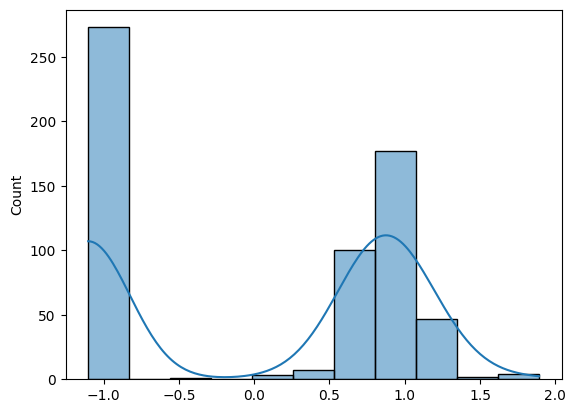

In [ ]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import seaborn as sns

trans = PowerTransformer(method='yeo-johnson')

# Corrected: Use df_encoded instead of data
la_trans = trans.fit_transform(df_encoded[["CoapplicantIncome"]])

# Reshape la_trans to a 1D array for Series creation if needed, or directly use it.
# Since we fit_transform on a DataFrame slice (even single column), it returns a 2D array.
# To get a 1D Series for skew/kurt, we'll flatten it.
la_trans_series = pd.Series(la_trans.flatten())

print("skewness :", la_trans_series.skew())
print("kurtosis :", la_trans_series.kurtosis())

sns.histplot(la_trans_series, kde=True)


In [ ]:
import numpy as np

# Apply log transformation to 'LoanAmount'
df_encoded['LoanAmount_log'] = np.log1p(df_encoded['LoanAmount'])

print("Original 'LoanAmount' vs. Log-transformed 'LoanAmount_log':")
display(df_encoded[['LoanAmount', 'LoanAmount_log']].head())

Original 'LoanAmount' vs. Log-transformed 'LoanAmount_log':


,LoanAmount,LoanAmount_log
0,128.0,4.859812
1,128.0,4.859812
2,66.0,4.204693
3,120.0,4.795791
4,141.0,4.955827
